In [ ]:
!git clone https://github.com/freedomwebtech/yolov5train
!unzip /content/yolov5train/yolov5.zip -d /content/yolov5train
%cd /content/yolov5train/yolov5
!pip3 install -r requirements.txt

Cloning into 'yolov5train'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 963.47 KiB | 9.73 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Archive:  /content/yolov5train/yolov5.zip
  inflating: /content/yolov5train/yolov5/benchmarks.py  
   creating: /content/yolov5train/yolov5/classify/
  inflating: /content/yolov5train/yolov5/classify/predict.py  
  inflating: /content/yolov5train/yolov5/classify/train.py  
  inflating: /content/yolov5train/yolov5/classify/val.py  
  inflating: /content/yolov5train/yolov5/CONTRIBUTING.md  
   creating: /content/yolov5train/yolov5/data/
  inflating: /content/yolov5train/yolov5/data/coco.yaml  
   creating: /content/yolov5train/yolov5/data/scripts/
  inflating: /content/yolov5train/yolov5/data/scripts/get_imagenet.sh  
  inflating: /content/yolov5train/yolov5/data/script

EDA (Exploratory Data analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
!unzip /content/gdrive/MyDrive/GuardianHelmet.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Dataset

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "GuardianHelmet/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "GuardianHelmet/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


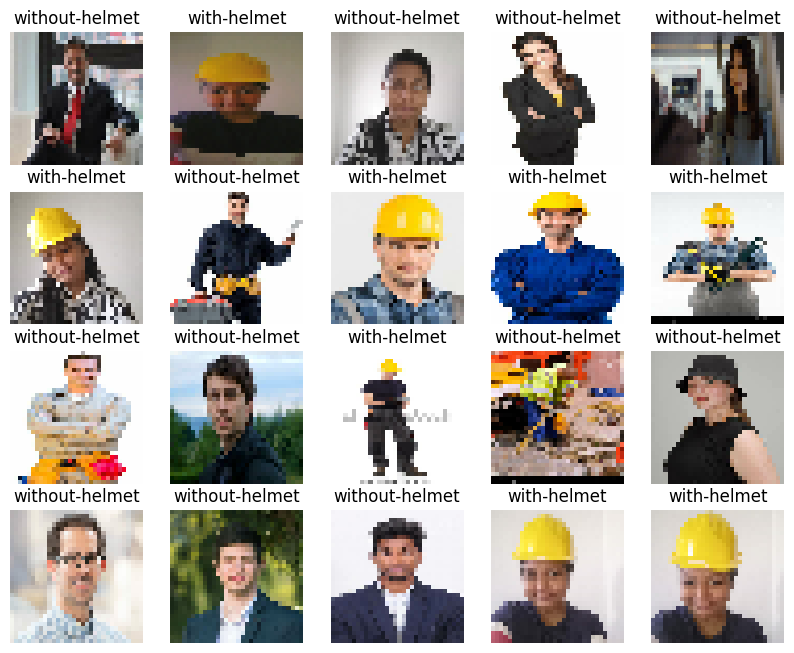

In [ ]:
class_names = ["with-helmet", "without-helmet"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Train the model

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50
)

Epoch 1/50
10/10 [==============================] - 8s 328ms/step - loss: 0.8373 - accuracy: 0.5100 - val_loss: 0.7318 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 5s 333ms/step - loss: 0.7166 - accuracy: 0.4750 - val_loss: 0.6745 - val_accuracy: 0.5250
Epoch 3/50
10/10 [==============================] - 4s 314ms/step - loss: 0.6647 - accuracy: 0.6000 - val_loss: 0.6439 - val_accuracy: 0.7900
Epoch 4/50
10/10 [==============================] - 5s 262ms/step - loss: 0.6467 - accuracy: 0.6600 - val_loss: 0.6199 - val_accuracy: 0.6450
Epoch 5/50
10/10 [==============================] - 3s 214ms/step - loss: 0.5972 - accuracy: 0.6950 - val_loss: 0.5481 - val_accuracy: 0.7750
Epoch 6/50
10/10 [==============================] - 4s 313ms/step - loss: 0.5242 - accuracy: 0.7600 - val_loss: 0.4594 - val_accuracy: 0.8350
Epoch 7/50
10/10 [==============================] - 4s 214ms/step - loss: 0.4165 - accuracy: 0.8750 - val_loss: 0.3384 - val_accuracy: 0.9150
Epoch 

Evaluate Model

In [ ]:
model.evaluate(val_ds)

10/10 [==============================] - 3s 15ms/step - loss: 7.9375e-04 - accuracy: 1.0000


[0.0007937476621009409, 1.0]

Prediction

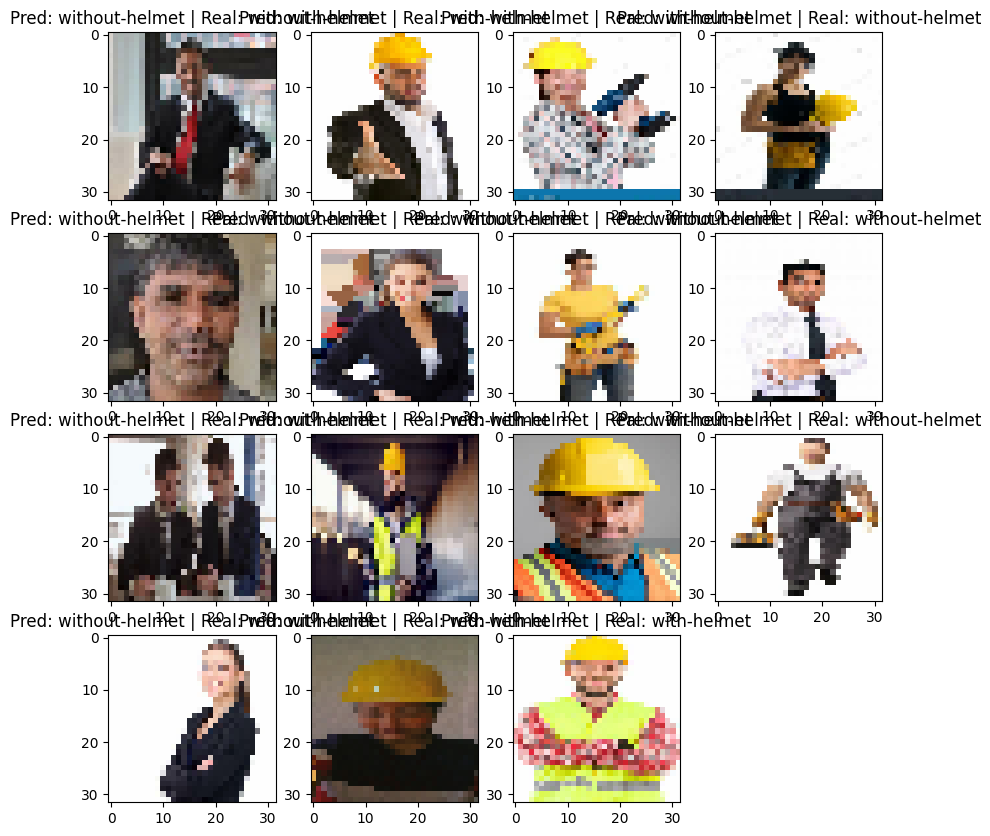

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in val_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(15):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Converting to TensorFlow

In [ ]:
from google.colab import files

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("detectionmodel.tflite", 'wb') as f:
  f.write(tflite_model)

# Download the TFLite model to local PC
files.download("detectionmodel.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorboardcolab


  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3834 sha256=d51455ad527fb5594d543b5fbafdd0c8e9b3435f4809383ad7d8059ed125af1a
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


In [ ]:
from tensorboardcolab import TensorBoardColab
tbc = TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://bdca-35-196-39-31.ngrok.io


In [ ]:
# Define the number of epochs and other training parameters
epochs = 50  # Set the number of training epochs

# Define the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tbc.get_graph_path(), histogram_freq=1)

# Use the model.fit() function with datasets
model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
)


Epoch 1/50
10/10 [==============================] - 7s 258ms/step - loss: 8.0647e-04 - accuracy: 1.0000 - val_loss: 7.4660e-04 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 5s 326ms/step - loss: 7.9532e-04 - accuracy: 1.0000 - val_loss: 7.0732e-04 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 5s 328ms/step - loss: 7.3629e-04 - accuracy: 1.0000 - val_loss: 6.6804e-04 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 6s 346ms/step - loss: 6.6485e-04 - accuracy: 1.0000 - val_loss: 6.2973e-04 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 5s 369ms/step - loss: 6.4822e-04 - accuracy: 1.0000 - val_loss: 6.0081e-04 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 5s 322ms/step - loss: 5.9654e-04 - accuracy: 1.0000 - val_loss: 5.7620e-04 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 4s 323ms/step - loss: 5.7086e-04 - accuracy: 1.0

In [ ]:
tbc


In [ ]:
%load_ext tensorboard


In [ ]:
%tensorboard --logdir=logs --bind_all --port=8081
